<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">University of Memphis</p>
<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">Center for Earthquake Research and Information</p>
<p style="color:#006B61; text-align:center; font-weight: bold; font-size: 24px; margin: 5px 0;">Homework 5</p>
<p style="color:black; text-align:center; font-weight: bold; margin: 2px 0;">Introduction to Global Geophysics</p>
<p style="color:#408770; text-align:center; font-weight: bold; margin: 2px 0;">Susana Delgado Andino</p>

<p style="color:#006B61; text-align:center; font-weight: bold; font-size: 22px; margin: 5px 0;"> Relative Present Days Motion

Pick 3 locations from the list, calculate their velocities. and plot the locations, velocity vectors and the corresponding Euler poles on a single world map. You should comply with the following requirements to get full credit:

- **Do NOT hand-calculate!**
- Implement the two approaches introduced in the lecture in Python and verify that they yield the same answer.
- Your implementation of each method should be sufficiently general and in a reusable form (e.g., functions or classes). Your code will be tested against locations not used in your solution. No credit will be given if it fails the test.
- Your solution should be submitted as a Jupyter Notebook. Make sure to provide proper documentation on how your code works in Markdown cells.


<p style="color:#006B61; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;"> Visual selection of the pole respect to the location

In this section, all the locations mentioned in Fowler’s book for plotting in Problem 3 have been graphed, along with the Euler poles for each plate pair listed in Table 2.1: Rotation vector for the present relative motion between some pairs of plates: NUVEL-1A. </p>

The plate boundaries were obtained from the GitHub repository by Ahlenius (2014), based on the original data from Peter Bird (PB2002).  
[https://github.com/fraxen/tectonicplates](https://github.com/fraxen/tectonicplates)


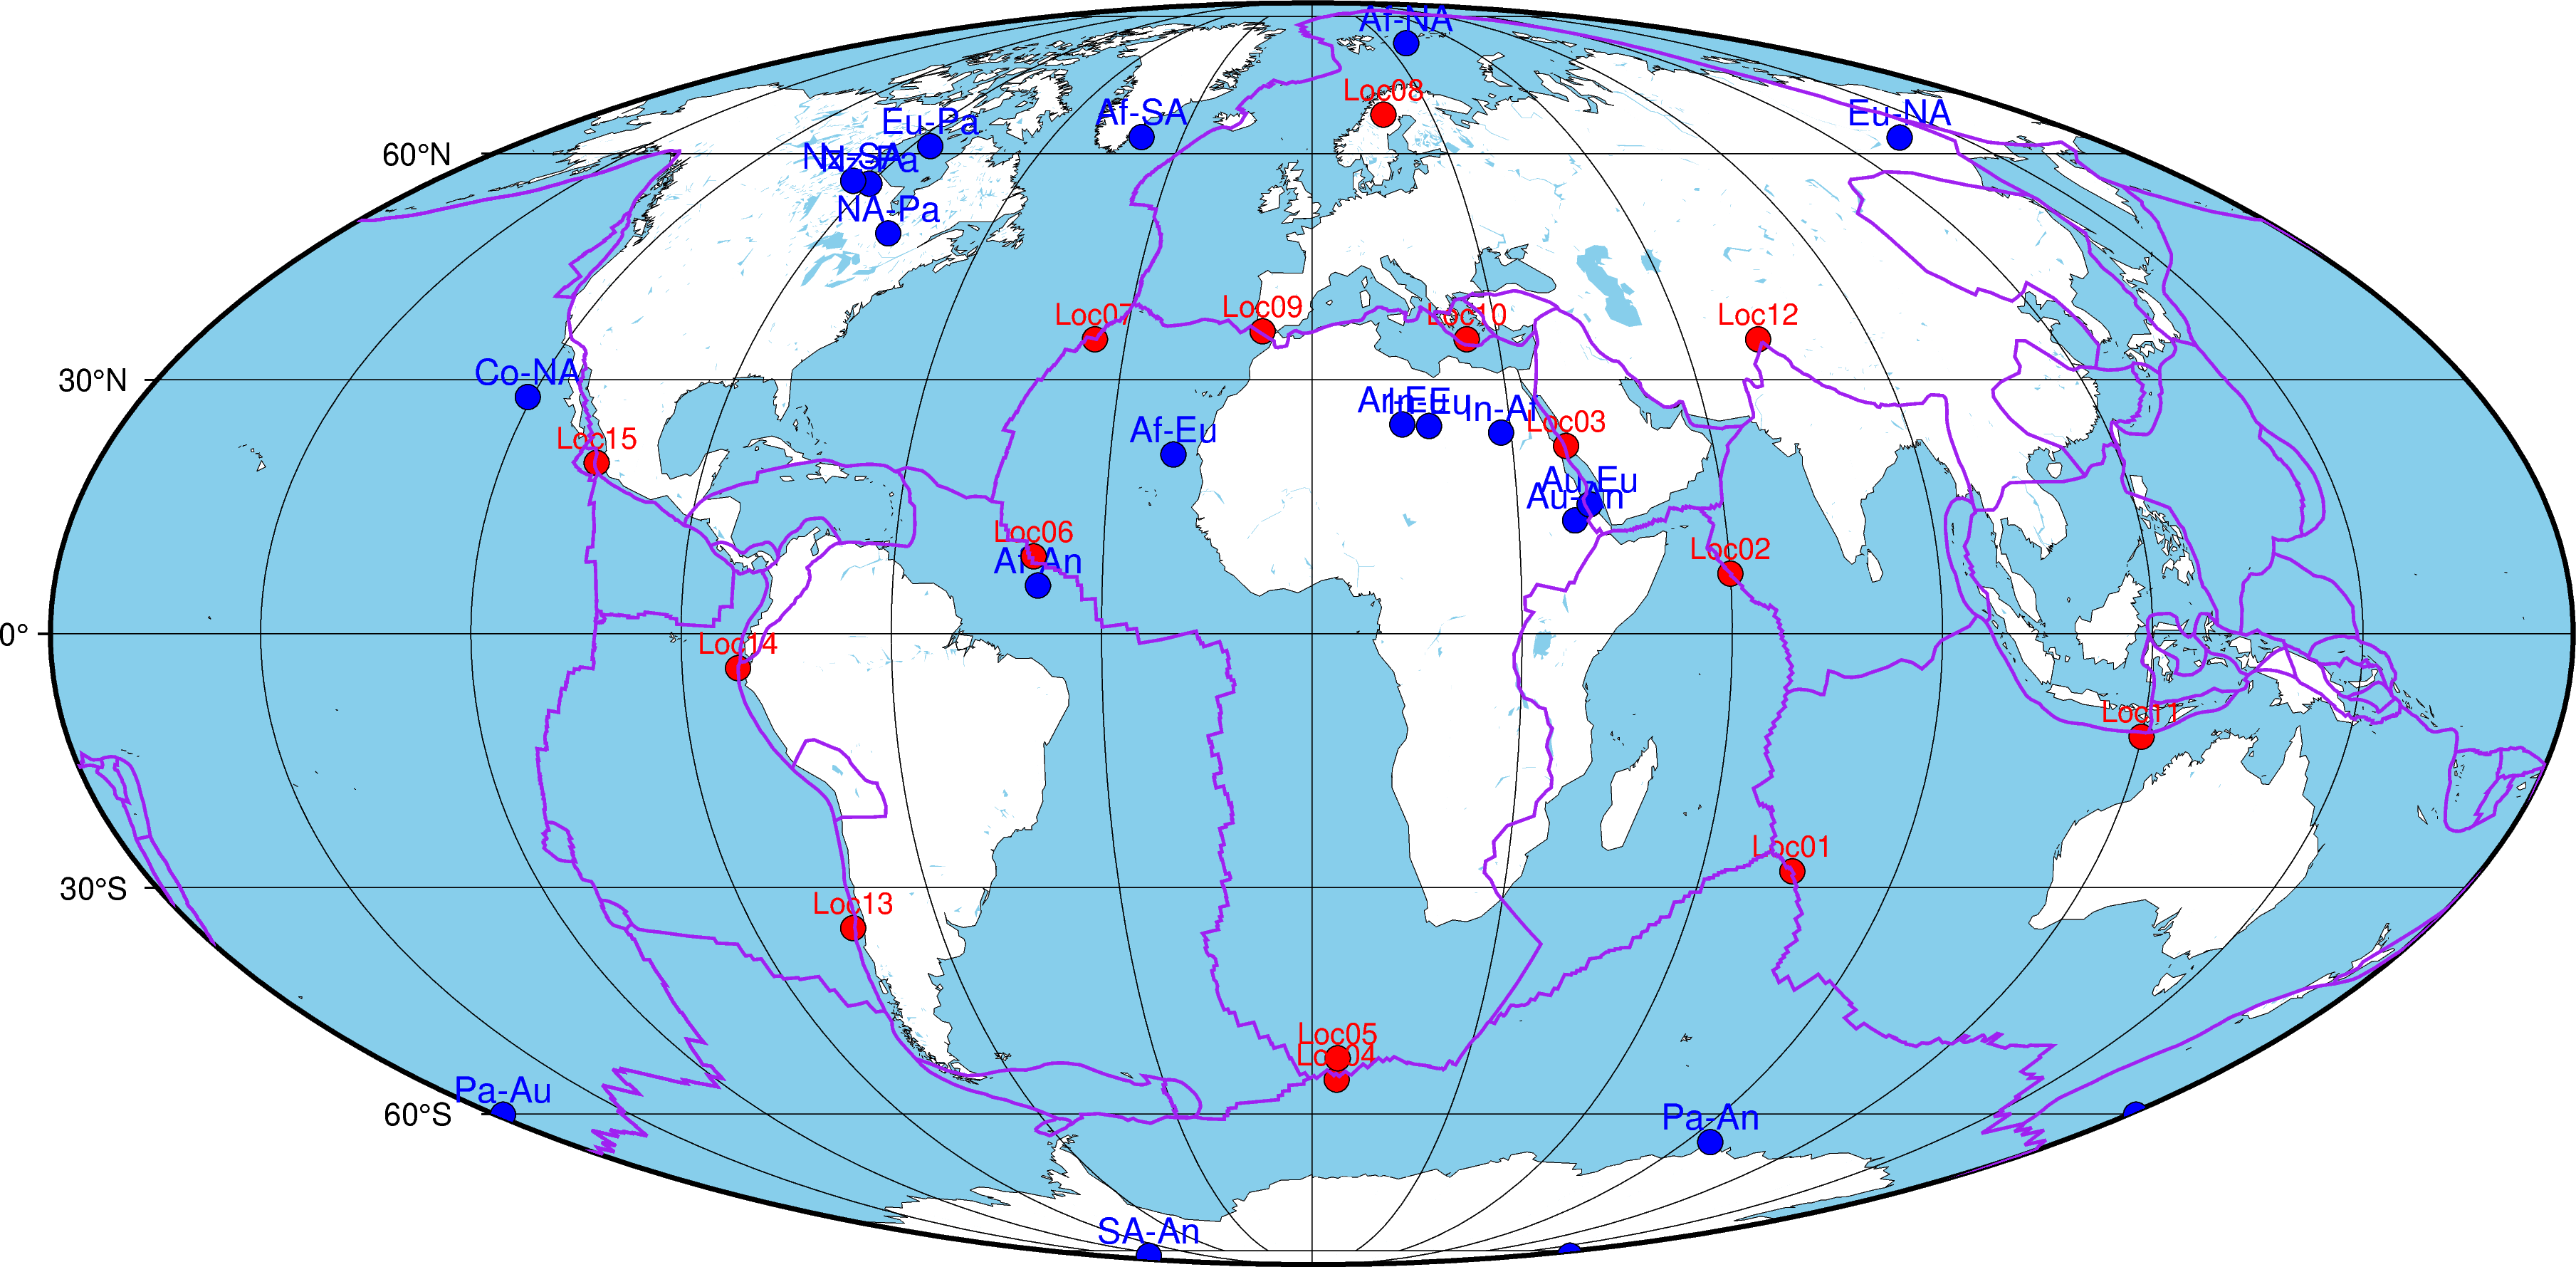

In [11]:
# Import libraries
import numpy as np
import pandas as pd
import pygmt
import json

# For the PB2002_boundaries.json
with open("PB2002_boundaries.json", "r") as f:
    plate_boundaries = json.load(f)

# Extract the coordinates
boundary_segments = plate_boundaries["features"]

# Pole locations form Table 2.1 Fowler Ch2
df_poles = pd.DataFrame([
    ["Af-An","Africa-Antarctica", 5.6, -39.2, 1.3], ["Af-Eu", "Africa-Eurasia", 21.0, -20.6, 1.2],
    ["Af-NA", "Africa-North America", 78.8, 38.3, 2.4], ["Af-SA", "Africa-South America", 62.5, -39.4, 3.1],
    ["Au-An", "Australia-Antarctica", 13.2, 38.2, 6.5], ["Au-Eu", "Australia-Eurasia", 15.1, 40.5, 6.9], 
    ["Pa-An", "Pacific-Antarctica", -64.3, 96.0, 8.7], ["SA-An", "South America-Antarctica", -86.4, -139.3, 2.6],
    ["Ar-Eu", "Arabia-Eurasia", 24.6, 13.7, 5.0], ["In-Eu", "India-Eurasia", 24.4, 17.7, 5.1],
    ["In-Af", "India-Africa", 23.6, 28.5, 4.1], ["Eu-NA", "Eurasia-North America", 62.4, 135.8, 2.1],
    ["Eu-Pa", "Eurasia-Pacific", 61.1, -85.8, 8.6], ["Pa-Au", "Pacific-Australia", -60.1, -178.3, 10.7],
    ["NA-Pa", "North America-Pacific", 48.7, -78.2, 7.5], ["Co-NA", "Cocos-North America", 27.9, -120.7, 13.6],
    ["Nz-Pa", "Nazca-Pacific", 55.6, -90.1, 13.6], ["Nz-SA", "Nazca-South America", 56.0, -94.0, 7.2],
], columns=["Pole Id", "Plate Pair", "P lat", "P lon", "omega"])

# Locations to probe
df_locations = pd.DataFrame([
    ["Loc01", "Southeast Indian Ridge", -28, 74], ["Loc02", "Carlsberg Ridge", 7, 60], ["Loc03", "Red Sea", 22, 38],
    ["Loc04", "Southwest Indian Ridge", -55, 5], ["Loc05", "Mid-Atlantic Ridge (52°S)", -52, 5],
    ["Loc06", "Mid-Atlantic Ridge (9°N)", 9, -40], ["Loc07", "Mid-Atlantic Ridge (35°N)", 35, -35],
    ["Loc08", "Iceland", 66, 18], ["Loc09", "Gorringe Bank", 36, -8], ["Loc10", "E. Mediterranean", 35, 25],
    ["Loc11", "Java Trench", -12, 120], ["Loc12", "Himalayas", 35, 72], ["Loc13", "S. Chile Trench", -35, -74],
    ["Loc14", "N. Peru Trench", -4, -82], ["Loc15", "Middle America Trench", 20, -106],
], columns=["Loc Id", "Location", "lat", "lon"])


fig = pygmt.Figure()

# Map
fig.coast(
    region="g", #For W in projection
    projection = "W0/30c",
    frame="ag",
    land="white",
    water="skyblue",
    shorelines="1/0.1p,black",
)

# Euler Poles
fig.plot( x=df_poles["P lon"], y=df_poles["P lat"], style="c0.3c", fill="blue", pen="black")

for i, row in df_poles.iterrows():
    fig.text(x=row["P lon"], y=row["P lat"], text=row["Pole Id"], font="12p,Helvetica,blue", offset="0c/0.3c")

# Locations
fig.plot( x=df_locations["lon"], y=df_locations["lat"], style="c0.3c", fill="red", pen="black")

for i, row in df_locations.iterrows():
    fig.text(x=row["lon"], y=row["lat"], text=row["Loc Id"], font="10p,Helvetica,red", offset="0c/0.3c")
    

for feature in boundary_segments:
    coords = feature["geometry"]["coordinates"]
    if feature["geometry"]["type"] == "LineString":
        lons, lats = zip(*coords)
        fig.plot(x=lons, y=lats, pen="1p,purple")

        
fig.show()


In [12]:
from IPython.display import display, HTML

html = f"""
<div style="display: flex; justify-content: space-around;">
    <div style="margin-right: 10px;">
        {df_poles.to_html(index=False)}
    </div>
        {df_locations.to_html(index=False)}
    </div>
</div>
"""
display(HTML(html))


Pole Id,Plate Pair,P lat,P lon,omega
Af-An,Africa-Antarctica,5.6,-39.2,1.3
Af-Eu,Africa-Eurasia,21.0,-20.6,1.2
Af-NA,Africa-North America,78.8,38.3,2.4
Af-SA,Africa-South America,62.5,-39.4,3.1
Au-An,Australia-Antarctica,13.2,38.2,6.5
Au-Eu,Australia-Eurasia,15.1,40.5,6.9
Pa-An,Pacific-Antarctica,-64.3,96.0,8.7
SA-An,South America-Antarctica,-86.4,-139.3,2.6
Ar-Eu,Arabia-Eurasia,24.6,13.7,5.0
In-Eu,India-Eurasia,24.4,17.7,5.1


<p style="color:#006B61; text-align:center; font-weight: bold; font-size: 18px; margin: 5px 0;"> Test poinst on the map

To test different points on the map, you must use the codes assigned to each pole. In the DataFrame, first enter the Pole ID, followed by the Loc ID you want to evaluate. <p/>

["Pole Id", "Loc Id"]

In [13]:
df_cases = pd.DataFrame([
    ["Nz-SA", "Loc13"],
    ["In-Eu", "Loc02"],
    ["Co-NA", "Loc03"],
    ["Af-Eu", "Loc09"],
], columns=["Pole Id", "Loc Id"])
df = df_cases.merge(df_poles, on="Pole Id").merge(df_locations, on="Loc Id")

df

,Pole Id,Loc Id,Plate Pair,P lat,P lon,omega,Location,lat,lon
0,Nz-SA,Loc13,Nazca-South America,56.0,-94.0,7.2,S. Chile Trench,-35,-74
1,In-Eu,Loc02,India-Eurasia,24.4,17.7,5.1,Carlsberg Ridge,7,60
2,Co-NA,Loc03,Cocos-North America,27.9,-120.7,13.6,Red Sea,22,38
3,Af-Eu,Loc09,Africa-Eurasia,21.0,-20.6,1.2,Gorringe Bank,36,-8


<p style="color:#006B61; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;"> First: Cross product

The linear velocity is obtained as the cross product of the angular velocity vector and the position vector:



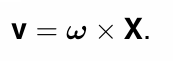

In [14]:
# Earth's radius in mm
R_earth_mm = 6371e6

# Functions
def deg2rad(deg):
    return deg * np.pi / 180

def sph_to_cart(lat_deg, lon_deg):
    lat = deg2rad(lat_deg)
    lon = deg2rad(lon_deg)
    x = np.cos(lat) * np.cos(lon)
    y = np.cos(lat) * np.sin(lon)
    z = np.sin(lat)
    return np.array([x, y, z])

def omega_vector(lat_deg, lon_deg, omega_deg_per_yr):
    omega_rad_yr = omega_deg_per_yr * 1e-7 * np.pi / 180
    return omega_rad_yr * sph_to_cart(lat_deg, lon_deg)

def velocity_vector(omega_vec, r_vec):
    return np.cross(omega_vec, r_vec)

# Velocities
results = []
for _, row in df.iterrows():
    omega_vec = omega_vector(row["P lat"], row["P lon"], row["omega"])
    r_vec = sph_to_cart(row["lat"], row["lon"])
    v_vec = velocity_vector(omega_vec, r_vec)

    # Convert to mm/yr
    v_cart = v_vec * R_earth_mm
    v_total = np.linalg.norm(v_cart)

    # Local tangent plane projection
    lon, lat = deg2rad(row["lon"]), deg2rad(row["lat"])
    v_east = -v_vec[0]*np.sin(lon) + v_vec[1]*np.cos(lon)
    v_north = (-v_vec[0]*np.sin(lat)*np.cos(lon)
               -v_vec[1]*np.sin(lat)*np.sin(lon)
               +v_vec[2]*np.cos(lat))

    v_east_mm_yr = v_east * R_earth_mm
    v_north_mm_yr = v_north * R_earth_mm

    # Azimuth from north (0° = north, 90° = east)
    azimuth_deg = np.degrees(np.arctan2(v_east_mm_yr, v_north_mm_yr)) % 360

    results.append({
        "vx": round(v_cart[0],2),
        "vy": round(v_cart[1],2),
        "vz": round(v_cart[2],2),
        "v_east_mm_yr": round(v_east_mm_yr,2),
        "v_north_mm_yr": round(v_north_mm_yr,2),
        "v_total_mm_yr": round(v_total,2),
        "azimuth_deg": round(azimuth_deg,2) 
    })

# Merge results
df_results = pd.concat([df, pd.DataFrame(results)], axis=1)

df_results



,Pole Id,Loc Id,Plate Pair,P lat,P lon,omega,Location,lat,lon,vx,vy,vz,v_east_mm_yr,v_north_mm_yr,v_total_mm_yr,azimuth_deg
0,Nz-SA,Loc13,Nazca-South America,56.0,-94.0,7.2,S. Chile Trench,-35,-74,77.88,13.20,12.54,78.50,15.31,79.98,78.96
1,In-Eu,Loc02,India-Eurasia,24.4,17.7,5.1,Carlsberg Ridge,7,60,-18.22,5.63,34.50,18.60,34.76,39.42,28.15
2,Co-NA,Loc03,Cocos-North America,27.9,-120.7,13.6,Red Sea,22,38,-83.44,77.26,45.01,112.26,48.55,122.30,66.61
3,Af-Eu,Loc09,Africa-Eurasia,21.0,-20.6,1.2,Gorringe Bank,36,-8,-2.04,-3.02,2.20,-3.28,2.72,4.26,309.67


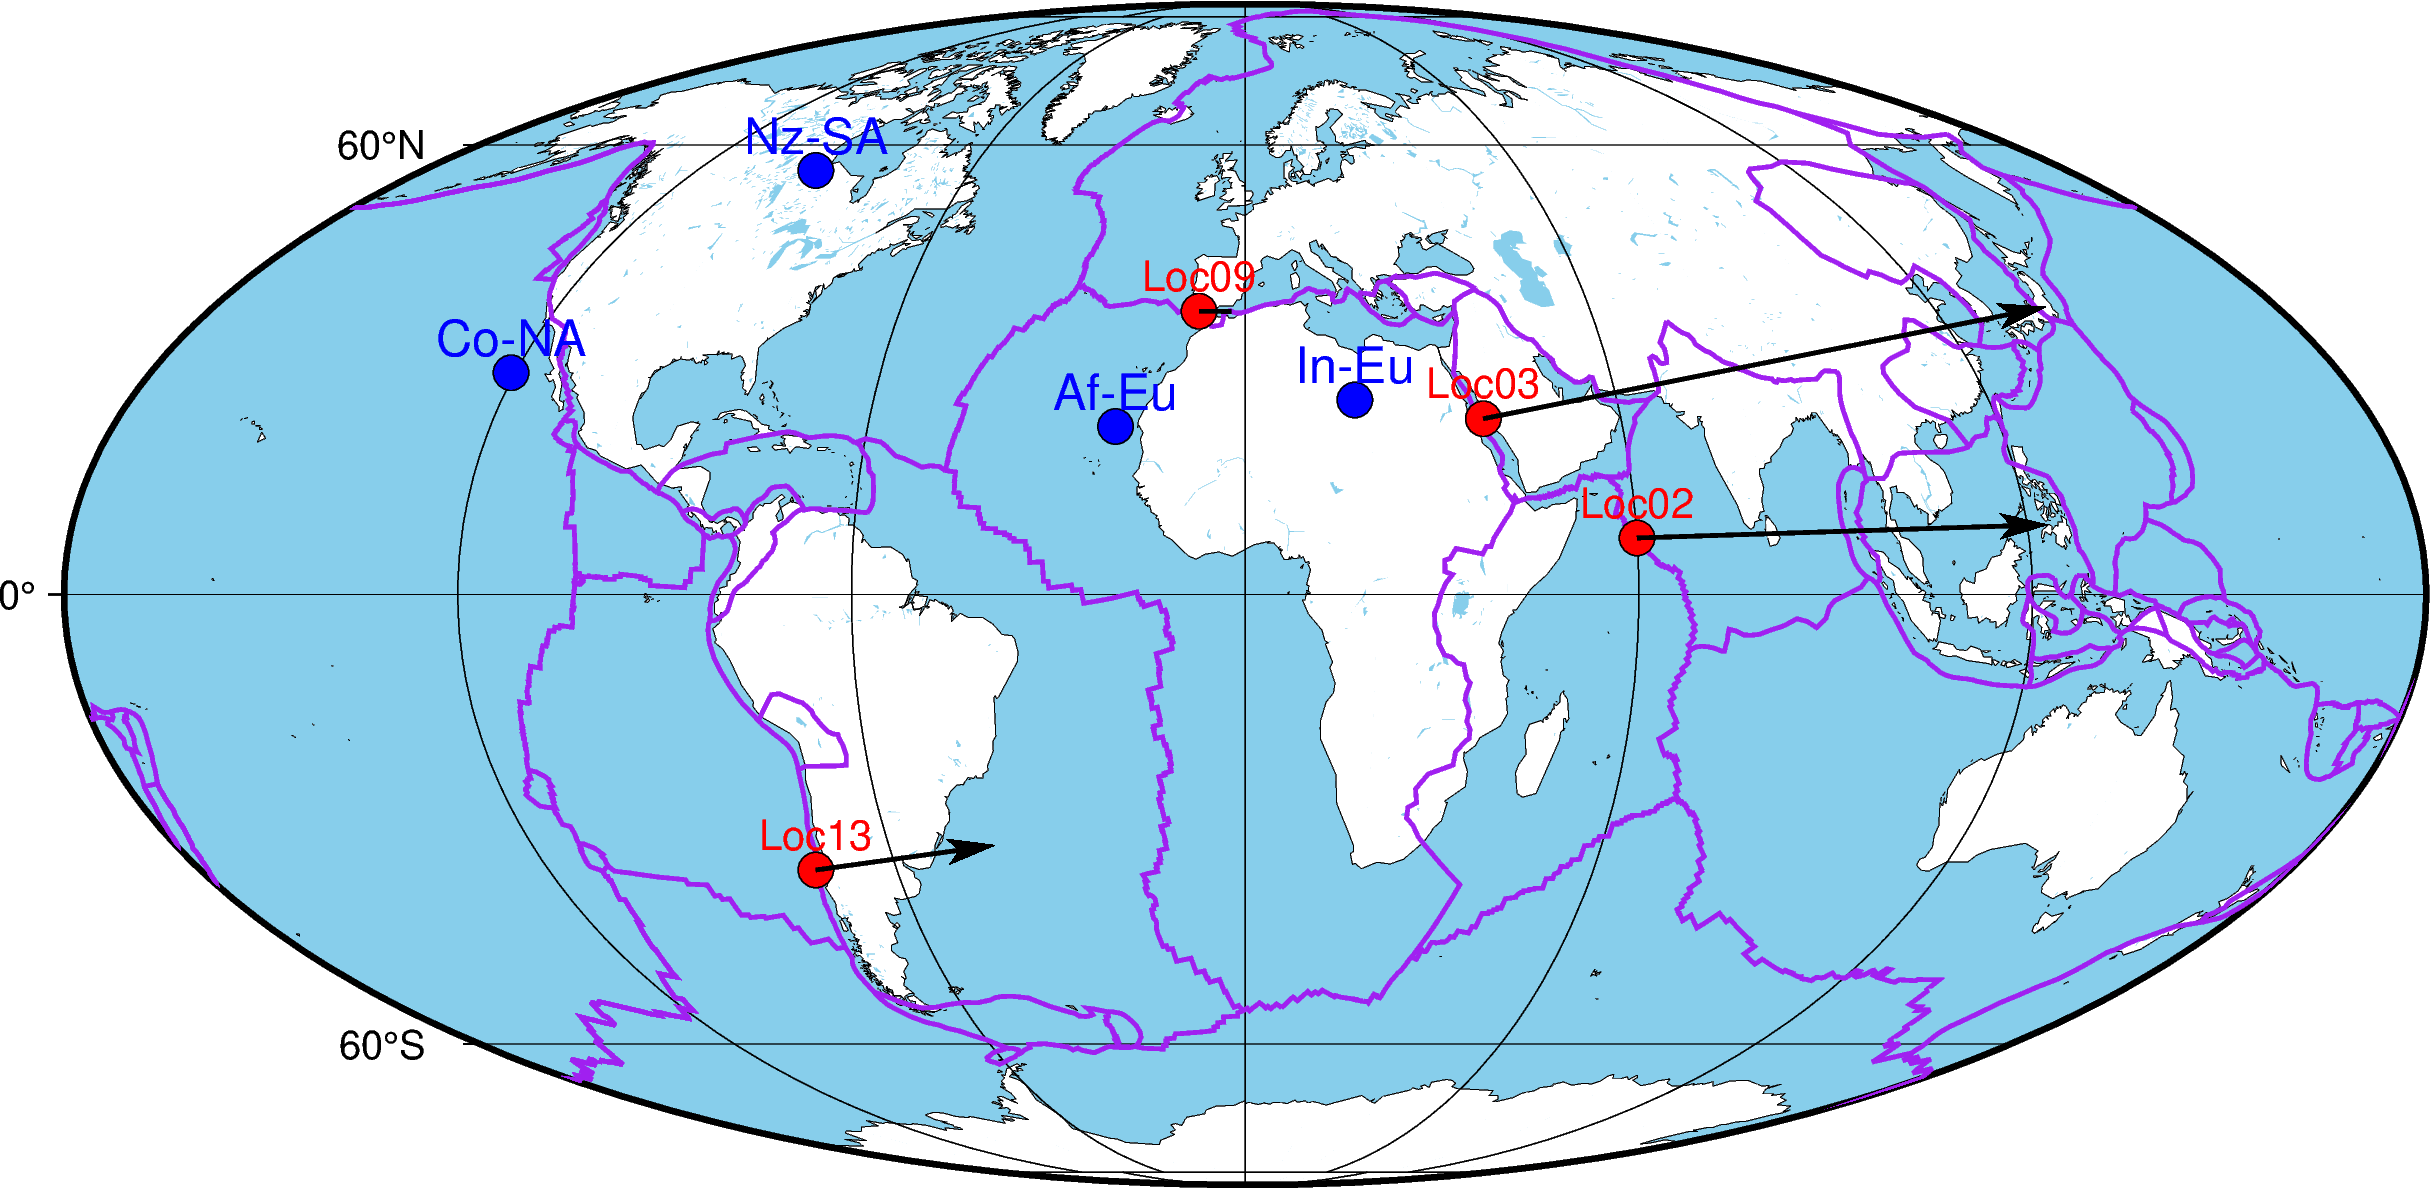

In [15]:
# Load plate boundaries
with open("PB2002_boundaries.json", "r") as f:
    plate_boundaries = json.load(f)
boundary_segments = plate_boundaries["features"]

# Create the map
fig = pygmt.Figure()

# Base map settings
fig.coast(
    region="g",
    projection="W0/20c",
    frame="ag",
    land="white",
    water="skyblue",
    shorelines="1/0.1p,black"
)

# Plot plate boundaries from PB2002
for feature in boundary_segments:
    coords = feature["geometry"]["coordinates"]
    if feature["geometry"]["type"] == "LineString":
        lons, lats = zip(*coords)
        fig.plot(x=lons, y=lats, pen="1p,purple")

# Plot Euler poles
fig.plot(
    x=df_results["P lon"],
    y=df_results["P lat"],
    style="c0.3c",
    fill="blue",
    pen="black"
)
for _, row in df_results.iterrows():
    fig.text(
        x=row["P lon"], y=row["P lat"],
        text=row["Pole Id"],
        font="12p,Helvetica,blue", offset="0c/0.3c"
    )

# Plot observation points
fig.plot(
    x=df_results["lon"],
    y=df_results["lat"],
    style="c0.3c",
    fill="red",
    pen="black"
)
for _, row in df_results.iterrows():
    fig.text(
        x=row["lon"], y=row["lat"],
        text=row["Loc Id"],
        font="10p,Helvetica,red", offset="0c/0.3c"
    )

# Plot velocity vectors from EN components
fig.plot(
    x=df_results["lon"],
    y=df_results["lat"],
    style="v0.4c+e",
    direction=[
        df_results["v_east_mm_yr"] / 10,
        df_results["v_north_mm_yr"] / 10
    ],
    pen="1p,black",
    fill="black"
)


fig.show()


<p style="color:#006B61; text-align:center; font-weight: bold; font-size: 20px; margin: 5px 0;"> Second: Geometry of spherical triangle

<img src="Picture1.png" alt="drawing" width="700"/>

In [16]:
# Earth radius in mm
R_earth_mm = 6371e6

# Degrees to radians
def deg2rad(deg):
    return deg * np.pi / 180

# Radians to degrees
def rad2deg(rad):
    return rad * 180 / np.pi

# Geometric method for velocity and azimuth 
def compute_velocity_and_azimuth(latP, lonP, latX, lonX, omega_deg_7):
    # Convert to radians
    φP, λP = deg2rad(latP), deg2rad(lonP)
    φX, λX = deg2rad(latX), deg2rad(lonX)

    # Angular distance θ (in radians)
    cos_theta = np.sin(φX)*np.sin(φP) + np.cos(φX)*np.cos(φP)*np.cos(λP - λX)
    theta = np.arccos(cos_theta)

    # Angular velocity in rad/yr
    omega_rad_yr = omega_deg_7 * 1e-7 * np.pi / 180

    # Velocity magnitude (mm/yr)
    v_mm_yr = R_earth_mm * omega_rad_yr * np.sin(theta)

    # Azimuth beta (in degrees)
    num = np.cos(φP) * np.sin(λX - λP)
    den = np.sin(theta)
    C = np.arcsin(num / den)
    beta_deg = (90 - rad2deg(C)) % 360
    beta_rad = deg2rad(beta_deg)

    # Velocity components
    v_east = v_mm_yr * np.sin(beta_rad)
    v_north = v_mm_yr * np.cos(beta_rad)

    return v_mm_yr, beta_deg, v_east, v_north

# Main loop for geometric method
results_geom = []
for _, row in df.iterrows():
    latP, lonP = row["P lat"], row["P lon"]
    latX, lonX = row["lat"], row["lon"]
    omega = row["omega"]  # in 10⁻⁷ deg/yr

    v_mm_yr, beta_deg, v_east, v_north = compute_velocity_and_azimuth(latP, lonP, latX, lonX, omega)

    results_geom.append({
        "v_theta_mm_yr": round(v_mm_yr, 2),
        "v_east_geom_mm_yr": round(v_east, 2),
        "v_north_geom_mm_yr": round(v_north, 2),
        "azimuth_beta_deg": round(beta_deg, 2)
    })

# Merge with original DataFrame
df_geom = pd.concat([df, pd.DataFrame(results_geom)], axis=1)
df_geom



,Pole Id,Loc Id,Plate Pair,P lat,P lon,omega,Location,lat,lon,v_theta_mm_yr,v_east_geom_mm_yr,v_north_geom_mm_yr,azimuth_beta_deg
0,Nz-SA,Loc13,Nazca-South America,56.0,-94.0,7.2,S. Chile Trench,-35,-74,79.98,78.50,15.31,78.96
1,In-Eu,Loc02,India-Eurasia,24.4,17.7,5.1,Carlsberg Ridge,7,60,39.42,18.60,34.76,28.15
2,Co-NA,Loc03,Cocos-North America,27.9,-120.7,13.6,Red Sea,22,38,122.30,112.26,48.55,66.61
3,Af-Eu,Loc09,Africa-Eurasia,21.0,-20.6,1.2,Gorringe Bank,36,-8,4.26,3.28,2.72,50.33


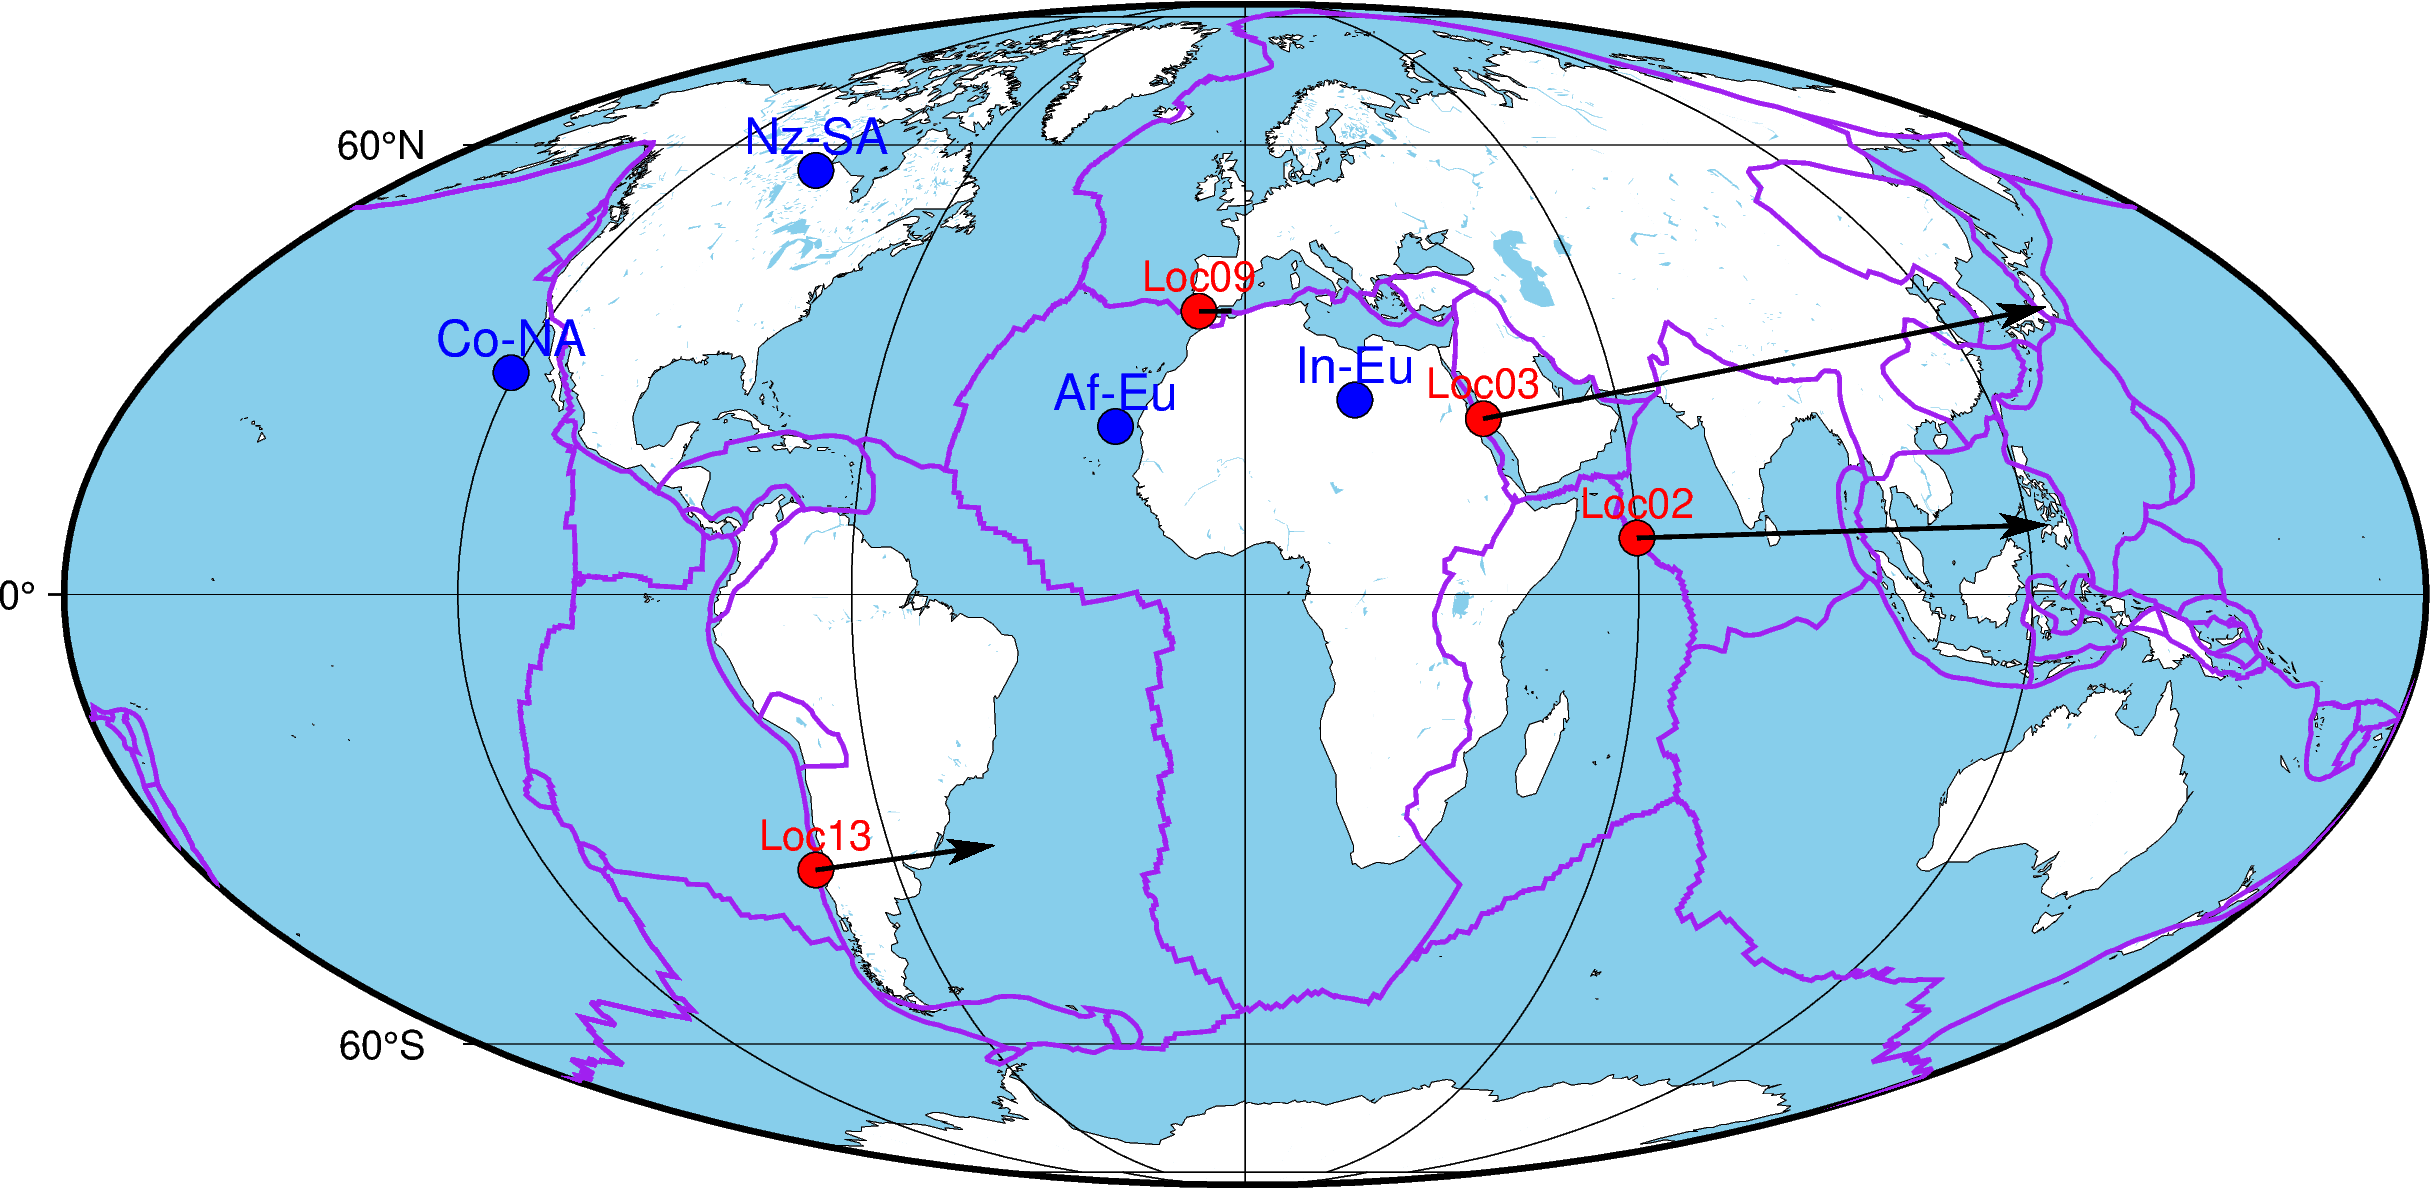

In [17]:
# Load plate boundaries
with open("PB2002_boundaries.json", "r") as f:
    plate_boundaries = json.load(f)
boundary_segments = plate_boundaries["features"]

# Create the map
fig = pygmt.Figure()

# Base map settings
fig.coast(
    #region=[-180, 180, -87, 87],
    #projection="M20c",
    region="g", 
    projection="W0/20c",
    frame="ag",
    land="white",
    water="skyblue",
    shorelines="1/0.1p,black"
)

# Plot plate boundaries from PB2002
for feature in boundary_segments:
    coords = feature["geometry"]["coordinates"]
    if feature["geometry"]["type"] == "LineString":
        lons, lats = zip(*coords)
        fig.plot(x=lons, y=lats, pen="1p,purple")

# Plot Euler poles
fig.plot(
    x=df_geom["P lon"],
    y=df_geom["P lat"],
    style="c0.3c",
    fill="blue",
    pen="black"
)
for _, row in df_geom.iterrows():
    fig.text(
        x=row["P lon"], y=row["P lat"],
        text=row["Pole Id"],
        font="12p,Helvetica,blue", offset="0c/0.3c"
    )

# Plot observation points
fig.plot(
    x=df_results["lon"],
    y=df_results["lat"],
    style="c0.3c",
    fill="red",
    pen="black"
)
for _, row in df_geom.iterrows():
    fig.text(
        x=row["lon"], y=row["lat"],
        text=row["Loc Id"],
        font="10p,Helvetica,red", offset="0c/0.3c"
    )

# Plot velocity vectors from calculated EN components
fig.plot(
    x=df_geom["lon"],
    y=df_geom["lat"],
    style="v0.4c+e",
    direction=[
        df_geom["v_east_geom_mm_yr"] /10,  # 
        df_geom["v_north_geom_mm_yr"] /10
    ],
    pen="1p,black",
    fill="black"
)



fig.show()